## Lake Zug Mooring Deployment (31/10/2025)

In [1]:
# imports
import xarray as xr
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mooring_locs = pd.DataFrame({
    'loc': ['LZC', 'LZE', 'LZW', 'LZN'],
    'xsc_plan': [2680090, 2680328, 2679884, 2679423],
    'ysc_plan': [1218816, 1218866, 1218764, 1219382],
    'xsc': [2680084, 2680314, 2679912, 2679436],
    'ysc': [1218840, 1218883, 1218760, 1219384]
})
# LZW ysc = 1218770?
mooring_locs

,loc,xsc_plan,ysc_plan,xsc,ysc
0,LZC,2680090,1218816,2680084,1218840
1,LZE,2680328,1218866,2680314,1218883
2,LZW,2679884,1218764,2679912,1218760
3,LZN,2679423,1219382,2679436,1219384


In [3]:
# Lake Zug bathymetry
bathy = xr.open_dataset('../../../../data/lake_zug/bathymetry/zugersee_bathy.nc')

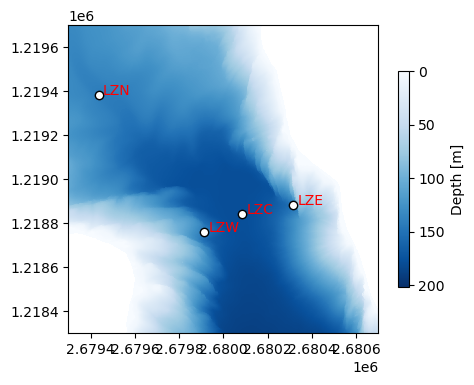

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))   # figsize=(5, 8)

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    # deployed locations
    ax.scatter(row.xsc, row.ysc, c='white', edgecolor='black')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

ax.set_xlim(2679300, 2680700)
ax.set_ylim(1218300, 1219700)

plt.show()

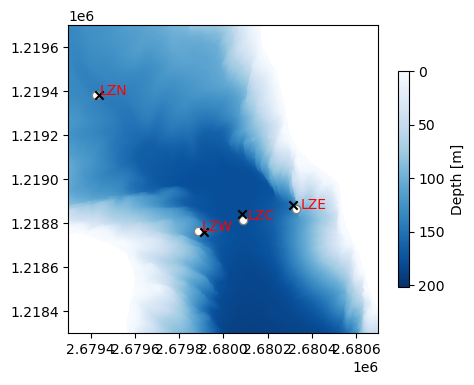

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    # planned locations
    ax.scatter(row.xsc_plan, row.ysc_plan, c='white', edgecolor='gray')
    ax.annotate(row['loc'], (row.xsc_plan, row.ysc_plan), color='red', xytext=(3, 0), textcoords='offset points')

    # deployed locations
    if not math.isnan(row.xsc) and not math.isnan(row.ysc):
        ax.scatter(row.xsc, row.ysc, c='black', marker='x')

ax.set_xlim(2679300, 2680700)
ax.set_ylim(1218300, 1219700)

plt.show()

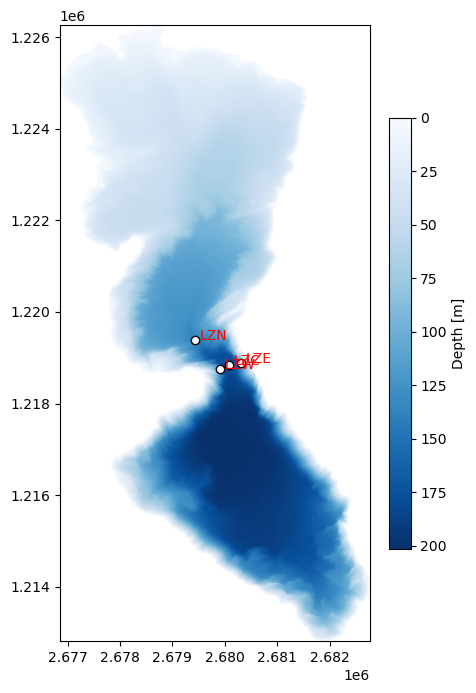

In [5]:
fig, ax = plt.subplots(figsize=(5, 8))   # figsize=(5, 8)

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    # deployed locations
    ax.scatter(row.xsc, row.ysc, c='white', edgecolor='black')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

plt.show()

### Movin LZN

LZN not currently in Canton Zug.

In [91]:
lzn_loc = pd.DataFrame({
    'label': ['current', 'move1', 'move2'],
    'xsc': [2679436, 2679487, 2679505],
    'ysc': [1219384, 1219414, 1219388]
})

current 141.52002
move1 139.08002
move2 141.80002000000002


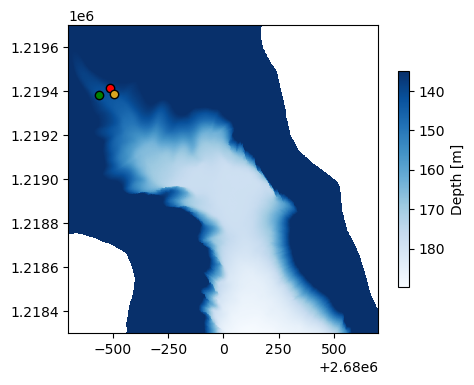

In [101]:
bathy_sel = bathy.sel(xsc=slice(2679300, 2680700), ysc=slice(1218300, 1219700))

fig, ax = plt.subplots(figsize=(5, 4))
palette = ['green', 'red', 'goldenrod']

im = ax.pcolormesh(bathy_sel['xsc'], bathy_sel['ysc'], bathy_sel['depth'], cmap='Blues_r', vmin=135)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for i, row in lzn_loc.iterrows():
    print(row.label, bathy_sel.depth.sel(xsc=row.xsc, ysc=row.ysc).item())
    ax.scatter(row.xsc, row.ysc, c=palette[i], edgecolor='black')

plt.show()

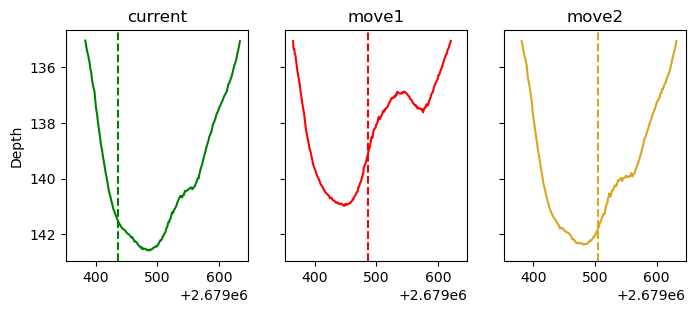

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
palette = ['green', 'red', 'goldenrod']

for i, row in lzn_loc.iterrows():
    coronal = bathy.sel(ysc=row.ysc)
    coronal = coronal.where(coronal['depth'] >= 135)
    ax[i].plot(coronal.xsc, coronal.depth, color=palette[i])
    ax[i].axvline(row.xsc, color=palette[i], ls='--')

    ax[i].set_title(row.label)

ax[0].set_ylabel("Depth")
ax[0].invert_yaxis()

plt.show()